# Logistic Regression

_class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)_

Value of Logistic regression strictly ranges from 0 to 1. Therefore, it can be used in Classification purpose like if Specifed email is Spam (1) or Not-Spam/Ham (0) {OR a tumour is malignant/cancerous or NOT}

If value is greater than 0.5 (> 0.5) it is classified in class 1 (Spam in this case) and if it is less than 0.5 (< 0.5) it is classified in class 0 (Ham in this case).

If model is predicting values very close to 1 like 0.90, 0.97, 0.99, etc... means model is strongly definite that it is in class 1 and vice versa.

###### Now, Let us study about Mathematical formula of Logistic Regression

First, it is essential to know the formula of Sigmoid function or Logistic Function which is:

<img src="https://latex.codecogs.com/gif.latex?%5Cdpi%7B150%7D%20sigmoid%28t%29%20%3D%20%5Cfrac%7B1%7D%7B1%20&plus;%20e%5E%7B-t%7D%7D" title="sigmoid(t) = \frac{1}{1 + e^{-t}}" />


Basically, Sigmoid Function takes any value (from -$ \infty $ to +$ \infty $) and convert it to the range {0, 1}

###### Now, Let's understand sigmoid function by visualization...

In [1]:
import numpy as np

def sigmoid(t):
    return 1/(1 + np.e**-t)

range_vals = np.linspace(-10, 10, 50)

sigmoid_values = sigmoid(range_vals)

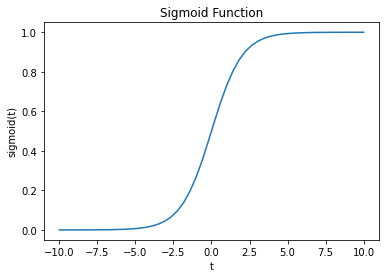

In [2]:
import matplotlib.pyplot as plt

plt.plot(range_vals, sigmoid_values)
plt.title("Sigmoid Function")
plt.xlabel("t")
plt.ylabel("sigmoid(t)")
plt.show()

Logistic Regression is used for Binary Classification as we discussed above then why we call it as Logistic 'Regression'? This is because we use Regression approach and then set a threshold, above or below, we can classify it to a specific class.

Let us consider a completely ficticious dataset of a Person being Obese or NOT by their given Weight.

Obese == 1

Not Obese == 0

Let us Plot this...

In [3]:
X = [20, 23, 24, 25, 30, 35, 40, 50, 53, 55, 60, 65, 70] # Weights
y = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1] # Obese or not

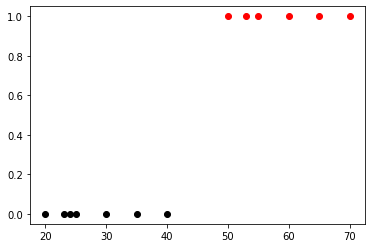

In [4]:
plt.plot(X[:7], y[:7], 'bo', color="black")
plt.plot(X[7:], y[7:], 'bo', color='red')
plt.show()

Now, let us fit Linear Regression in this data...

In [5]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)

In [7]:
y_pred = reg.predict(X)

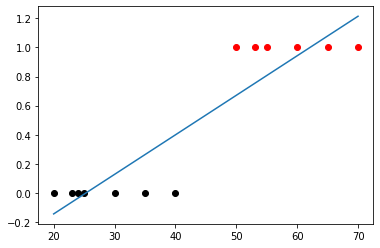

In [8]:
plt.plot(X[:7], y[:7], 'bo', color="black")
plt.plot(X[7:], y[7:], 'bo', color='red')
plt.plot(X, y_pred)
plt.show()

As you can see this is not at all a Good Technique and Linear Regression Fails to do this...

Here, Sigmoid or Logistic Function comes in to play. Let me show you the data and Sigmoid function in one plot and you will automatically understand why is it so

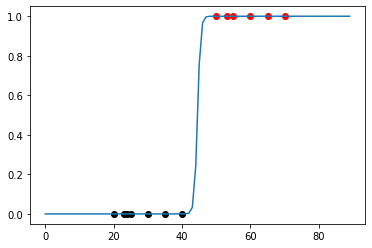

In [9]:
sig_log_vals = sigmoid(np.linspace(-100, 100, 90))

plt.plot(X[:7], y[:7], 'bo', color="black")
plt.plot(X[7:], y[7:], 'bo', color="red")
plt.plot(sig_log_vals)
plt.show()

### Making Logistic Regression Algorithm with Scikit learn

In [10]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression().fit(X, y.ravel())

#### Coefficient and intercept of fitted model

In [11]:
logit_reg.coef_

array([[0.59759753]])

In [12]:
logit_reg.intercept_

array([-26.81246496])

#### Prediction

In [13]:
print(logit_reg.predict([[10]]))
print(logit_reg.predict([[56]]))

[0]
[1]


We can see that our model is Predicting Weight 10 as 'NOT obese' and Weight 55 as 'Obese', which is True as per our data!

In [14]:
y_pred = logit_reg.predict(X)

In [15]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

#### How does a Prediction Curve looks like ?

In [16]:
X_test = np.arange(0, 100, 0.1).reshape(-1, 1)

In [17]:
y_log_pred = logit_reg.predict_proba(X_test)

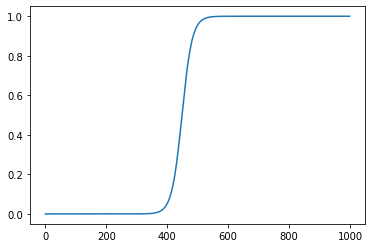

In [18]:
plt.plot(y_log_pred[:, 1])
plt.show()

## Working with Real world Dataset

Now, we will work with Real world dataset and make predictions using Logistic regression

### About Dataset :

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

### Importing Dataset with Pandas:

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv(r'dataset\framingham.csv')

In [21]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### About dataset:

• Sex: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


As we can see this data has many Null values.

So we will replace this Null value by the mean. Using this pandas function :

In [23]:
df.mean()

male                 0.429212
age                 49.584946
education            1.978950
currentSmoker        0.494101
cigsPerDay           9.003089
BPMeds               0.029630
prevalentStroke      0.005899
prevalentHyp         0.310524
diabetes             0.025720
totChol            236.721585
sysBP              132.352407
diaBP               82.893464
BMI                 25.802008
heartRate           75.878924
glucose             81.966753
TenYearCHD           0.151958
dtype: float64

In [24]:
df = df.fillna(df.mean())

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


We have succesfully got rid of the nan/Null values! Now we can fit our DataFrame

In [26]:
X = df.iloc[:, :-1] # X has all columns except the last column because it is the column we have to make predictions for.
y = df.iloc[:, -1]  # y has last column

X = np.array(X)
y = np.array(y)

In [27]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Making Model :

In [29]:
chd = LogisticRegression()

In [30]:
chd.fit(X_train, y_train)

LogisticRegression()

In [31]:
chd.score(X_test, y_test)

0.8537735849056604

In [32]:
y_pred = chd.predict(X_test)

In [33]:
print("Predicted Values (top 10):- \n")
y_pred[:10]

Predicted Values (top 10):- 



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[714   7]
 [117  10]]


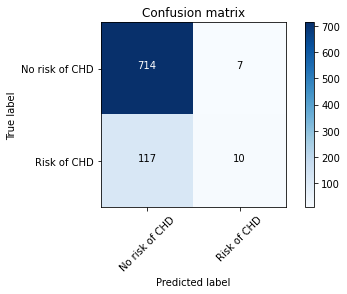

In [35]:
from PCM.PCM import plot_confusion_matrix # External function in my PC

plot_confusion_matrix(cm, ["No risk of CHD", "Risk of CHD"])

Our model is performing good, but it has predicted 'No risk of CHD' for 117 people which actually have 'Risk of CHD'.

In [36]:
chd.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}